<a href="https://colab.research.google.com/github/vivekpenuli/healthcare/blob/main/covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:

import keras

#import the required libraries and methods
from keras.layers import Input, Lambda, Dense, Flatten, Dropout
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
ImgSize = [224, 224]
#To get the location of "malaria detection cell images" dataset in the drive
train_path = '/content/drive/MyDrive/Covid_19 Dataset:11 04 2021/train'
test_path = '/content/drive/MyDrive/Covid_19 Dataset:11 04 2021/test'
validation_path='/content/drive/MyDrive/Covid_19 Dataset:11 04 2021/valid'

In [ ]:
import os
train_para_dir = os.path.join(train_path,'covid')  # directory with training covid pictures
train_un_dir = os.path.join(train_path, 'normal')  # directory with  training normal pictures
Testing_para_dir = os.path.join(test_path, 'covid')  # directory with  testing covid pictures
Testing_un_dir = os.path.join(test_path, 'normal')    # directory with testing normal picture
validation_para_dir = os.path.join(validation_path, 'covid')  # directory with  validation covid pictures
validation_un_dir = os.path.join(validation_path, 'normal')  # directory with Validation normal picture

In [ ]:
num_para_tr = len(os.listdir(train_para_dir))
num_un_tr = len(os.listdir(train_un_dir))

num_para_test = len(os.listdir(Testing_para_dir))
num_un_test = len(os.listdir(Testing_un_dir))


num_para_val = len(os.listdir(validation_para_dir))
num_un_val = len(os.listdir(validation_un_dir))

total_train = num_para_tr + num_un_tr
total_val = num_para_val + num_un_val
total_test=num_para_test + num_un_test

In [ ]:
print('total training covid images:', num_para_tr)
print('total training normal images:', num_un_tr)
print("--")
print('total Testing covid images:', num_para_test)
print('total Testing normal images:', num_un_test)
print("--")
print('total validation covid images:', num_para_val)
print('total validation normal images:', num_un_val)
print("--")
print("Total training images:", total_train)
print("Total Testing images:", total_test)
print("Total validation images:", total_val)

total training covid images: 2169
total training normal images: 3000
--
total Testing covid images: 723
total Testing normal images: 1000
--
total validation covid images: 723
total validation normal images: 1000
--
Total training images: 5169
Total Testing images: 1723
Total validation images: 1723


In [ ]:
vgg = VGG16(input_shape=ImgSize + [3], weights='imagenet', include_top=False)

58892288/58889256 [==============================] - 1s 0us/step


In [ ]:

for layer in vgg.layers:
    layer.trainable = False

In [ ]:

folders = glob('/content/drive/MyDrive/Covid_19 Dataset:11 04 2021/train/*')
print(folders)

['/content/drive/MyDrive/Covid_19 Dataset:11 04 2021/train/covid', '/content/drive/MyDrive/Covid_19 Dataset:11 04 2021/train/normal']


In [ ]:
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)

In [ ]:
model = Model(inputs=vgg.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:

model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:

from keras.preprocessing.image import ImageDataGenerator

In [ ]:

train_datagen = ImageDataGenerator(rescale=1/255,
                             rotation_range=20,
                             horizontal_flip=True,
                             height_shift_range=0.1,
                             width_shift_range=0.1,
                             shear_range=0.1,
)

In [ ]:

Valid_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Covid_19 Dataset:11 04 2021/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 5169 images belonging to 2 classes.


In [ ]:
Valid_set = Valid_datagen.flow_from_directory('/content/drive/MyDrive/Covid_19 Dataset:11 04 2021/valid',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1723 images belonging to 2 classes.


In [ ]:
m = model.fit_generator(
  training_set,
  validation_data=Valid_set,
  epochs=4,
  steps_per_epoch=len(training_set),
  validation_steps=len(Valid_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/4
162/162 [==============================] - 2184s 13s/step - loss: 0.6017 - accuracy: 0.7639 - val_loss: 0.3482 - val_accuracy: 0.8474
Epoch 2/4
162/162 [==============================] - 70s 430ms/step - loss: 0.2910 - accuracy: 0.8799 - val_loss: 0.3327 - val_accuracy: 0.8561
Epoch 3/4
162/162 [==============================] - 71s 435ms/step - loss: 0.2273 - accuracy: 0.9011 - val_loss: 0.3643 - val_accuracy: 0.8369
Epoch 4/4
162/162 [==============================] - 73s 449ms/step - loss: 0.2157 - accuracy: 0.9130 - val_loss: 0.2270 - val_accuracy: 0.9060


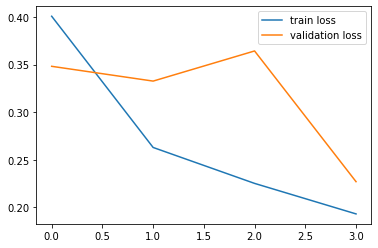

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss 
plt.plot(m.history['loss'], label='train loss')
plt.plot(m.history['val_loss'], label='validation loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

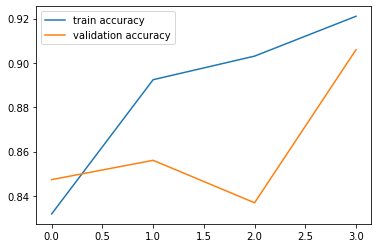

<Figure size 432x288 with 0 Axes>

In [ ]:

# plot the accuracy
plt.plot(m.history['accuracy'], label='train accuracy')
plt.plot(m.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Covid_19 Dataset:11 04 2021/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1723 images belonging to 2 classes.


In [ ]:
test_loss, test_accuracy = model.evaluate(
  test_set,
  steps=len(test_set),
)

54/54 [==============================] - 498s 9s/step - loss: 0.1687 - accuracy: 0.9338


In [ ]:
print("accuracy on test dataset",test_accuracy)
print("----")
print("loss on test set",test_loss)

accuracy on test dataset 0.9338363409042358
----
loss on test set 0.16870945692062378



model.save('covid19.h5')

In [ ]:
model.save('Covid19model.h5')